A 3 x 3 magic square is a 3 x 3 grid filled with distinct numbers from 1 to 9 such that each row, column, and both diagonals all have the same sum.

Given a row x col grid of integers, how many 3 x 3 contiguous magic square subgrids are there?

Note: while a magic square can only contain numbers from 1 to 9, grid may contain numbers up to 15.

 

Example 1:

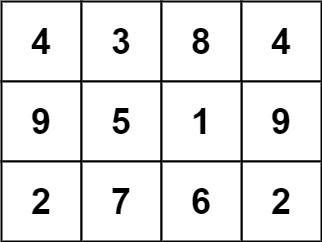

Input: grid = [[4,3,8,4],[9,5,1,9],[2,7,6,2]]
Output: 1
Explanation: 
The following subgrid is a 3 x 3 magic square:

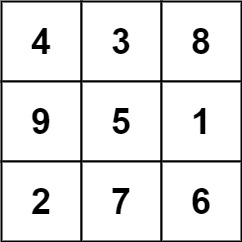

while this one is not:

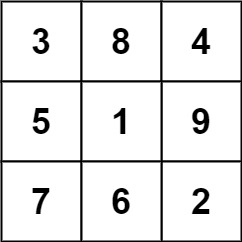

In total, there is only one magic square inside the given grid.

Example 2:

Input: grid = [[8]]
Output: 0

 

Constraints:

    row == grid.length
    col == grid[i].length
    1 <= row, col <= 10
    0 <= grid[i][j] <= 15



In [ ]:
class Solution:
    def numMagicSquaresInside(self, grid: List[List[int]]) -> int:
        ans = 0
        m = len(grid)
        n = len(grid[0])
        for row in range(m - 2):
            for col in range(n - 2):
                if self._isMagicSquare(grid, row, col):
                    ans += 1
        return ans

    def _isMagicSquare(self, grid, row, col):
        seen = [False] * 10
        for i in range(3):
            for j in range(3):
                num = grid[row + i][col + j]
                if num < 1 or num > 9:
                    return False
                if seen[num]:
                    return False
                seen[num] = True

        # Check if diagonal sums are the same
        diagonal1 = (
            grid[row][col] + grid[row + 1][col + 1] + grid[row + 2][col + 2]
        )
        diagonal2 = (
            grid[row + 2][col] + grid[row + 1][col + 1] + grid[row][col + 2]
        )

        if diagonal1 != diagonal2:
            return False

        # Check if all row sums are the same as the diagonal sums
        row1 = grid[row][col] + grid[row][col + 1] + grid[row][col + 2]
        row2 = (
            grid[row + 1][col] + grid[row + 1][col + 1] + grid[row + 1][col + 2]
        )
        row3 = (
            grid[row + 2][col] + grid[row + 2][col + 1] + grid[row + 2][col + 2]
        )

        if not (row1 == diagonal1 and row2 == diagonal1 and row3 == diagonal1):
            return False

        # Check if all column sums are the same as the diagonal sums
        col1 = grid[row][col] + grid[row + 1][col] + grid[row + 2][col]
        col2 = (
            grid[row][col + 1] + grid[row + 1][col + 1] + grid[row + 2][col + 1]
        )
        col3 = (
            grid[row][col + 2] + grid[row + 1][col + 2] + grid[row + 2][col + 2]
        )

        if not (col1 == diagonal1 and col2 == diagonal1 and col3 == diagonal1):
            return False

        return True